In [53]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [64]:
df = pd.read_csv('stroke.csv')

In [55]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [56]:
df.drop('id',axis=1,inplace=True)

In [57]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [58]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [59]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

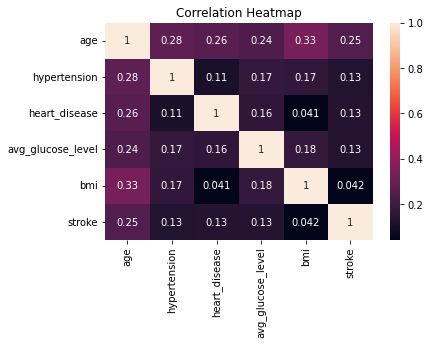

In [60]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

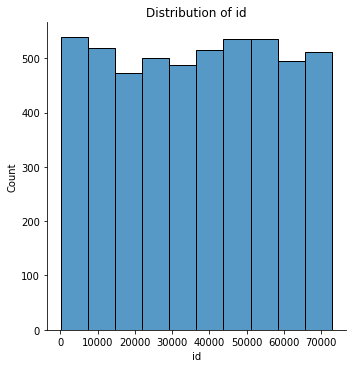

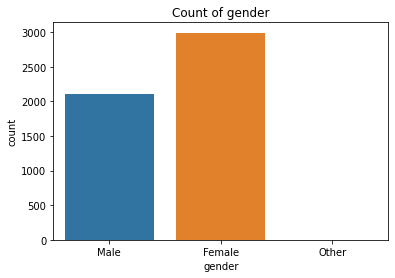

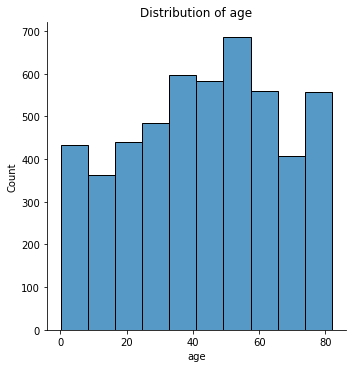

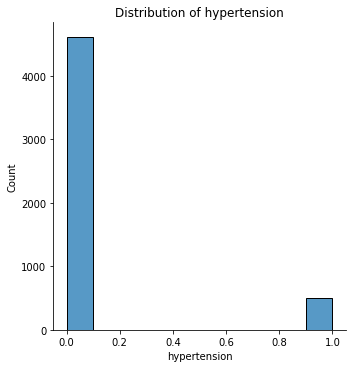

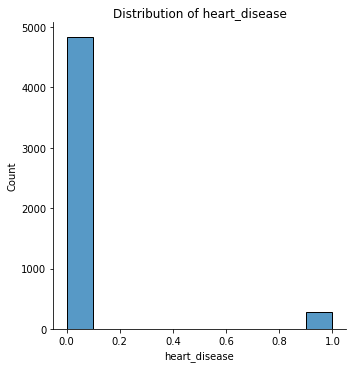

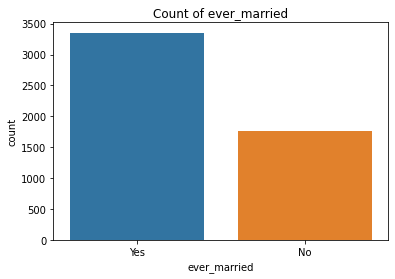

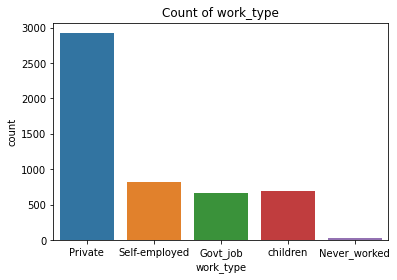

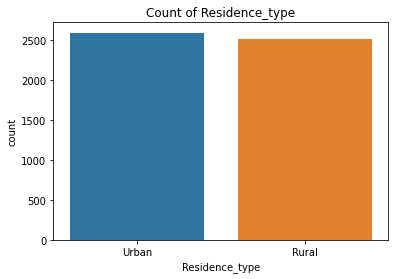

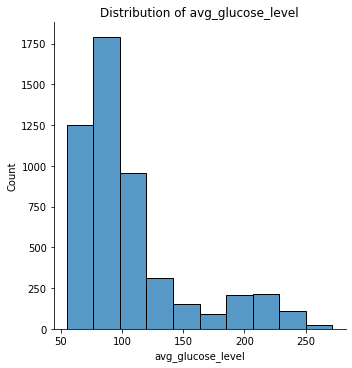

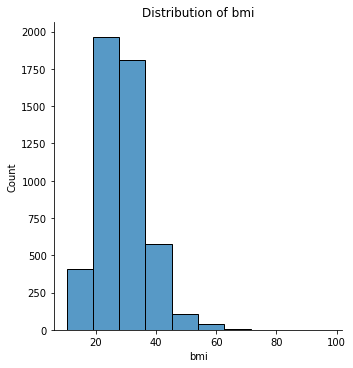

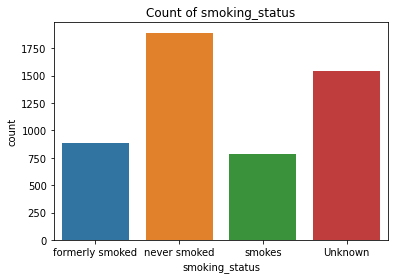

In [66]:
for column in df.columns:
    if column != 'stroke':
        if df[column].dtype != 'O':
            sns.displot(df[column], kde=False, bins=10)
            plt.title(f'Distribution of {column}')
            plt.show()
        else:
            sns.countplot(data=df, x=column)
            plt.title(f'Count of {column}')
            plt.show()

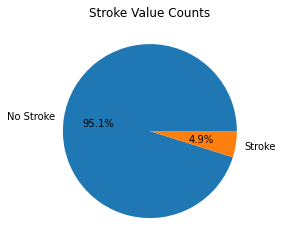

In [67]:
# Plot a pie chart of stroke values before removing unknown smokers
stroke_counts = df['stroke'].value_counts()
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%')
plt.title('Stroke Value Counts')
plt.show()

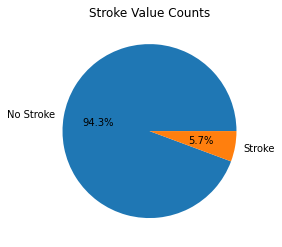

In [68]:
# Removing unknown smokers
df= df[df['smoking_status'] != 'Unknown']
stroke_counts = df['stroke'].value_counts()

# Plot a pie chart of stroke values
plt.pie(stroke_counts, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%')
plt.title('Stroke Value Counts')
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['gender','ever_married','work_type','Residence_type','smoking_status'] 
df[cols] = df[cols].apply(le.fit_transform)

In [40]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [42]:
#Performing standardization on continuous variables
from sklearn.preprocessing import StandardScaler

# Fit the StandardScaler to the training data
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

In [43]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,1.051434,0,1,Yes,Private,Urban,2.706375,0.981345,formerly smoked,1
1,Female,0.786070,0,0,Yes,Self-employed,Rural,2.121559,NaN,never smoked,1
2,Male,1.626390,0,1,Yes,Private,Rural,-0.005028,0.459269,never smoked,1
3,Female,0.255342,0,0,Yes,Private,Urban,1.437358,0.701207,smokes,1
4,Female,1.582163,1,0,Yes,Self-employed,Rural,1.501184,-0.623083,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,1.626390,1,0,Yes,Private,Urban,-0.494658,NaN,never smoked,0
5106,Female,1.670617,0,0,Yes,Self-employed,Urban,0.420775,1.414286,never smoked,0
5107,Female,-0.363842,0,0,Yes,Self-employed,Rural,-0.511443,0.217332,never smoked,0
5108,Male,0.343796,0,0,Yes,Private,Rural,1.328257,-0.419346,formerly smoked,0
